In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import *
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import random

X_train , y_train = load_svmlight_file("a9a.txt", n_features=123)
X_test, y_test = load_svmlight_file("a9a.t", n_features=123)

y_train =  y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0],1)

m, n = np.shape(X_train)
w = np.ones((n, 1))#初始化参数
c = 0.5#初始化C
alpha = 0.01#学习率
iteration = 500#循环次数500

In [2]:
#随机梯度
def stochastic_gradient(w):
    index =  (1 - y_train * (X_train * w) < 0)
    y = y_train.copy()
    y[index] = 0
    randomNum = np.random.randint(0,X_train.shape[0])
    Epgradient = - ((X_train)[randomNum].T * y[randomNum]).reshape(123,1)
    gradient = w +  Epgradient
    return gradient
#loss函数
def loss(x,y,w):
    Eploss = 1 - y * x.dot(w)
    Eploss[Eploss < 0] = 0
    loss = 0.5 * np.dot(w.transpose(), w ).sum() + Eploss.sum()
    return loss / x.shape[0]

loss_train, loss_test = ([],[])
#随机梯度实现
def gradientDescent(w):
    for i in range (0, iteration ):
        gradient = stochastic_gradient(w)
        w -= alpha * gradient
        loss_train.append(loss(X_train , y_train ,w))
        loss_test.append(loss(X_train , y_train ,w))
if __name__=='__main__':
    gradientDescent(w)
    print(loss_train,'\n')
    print(loss_test,'\n')

[11.118418913731153, 10.973807889125794, 10.81836494441314, 10.671152663050334, 10.537041837080682, 10.4392466023943, 10.294158499888427, 10.148870341437954, 10.014865632051377, 9.8729775038794099, 9.7818246575725016, 9.6541173077887681, 9.5301815703983355, 9.392448560091875, 9.2568898301864575, 9.1249505433693763, 9.0008605893211833, 8.8642245749785342, 8.7348666181365342, 8.6130985923777725, 8.4852943664523472, 8.3775450273761063, 8.2456976025623892, 8.1172779280106528, 8.0026478397800673, 7.9302025719641449, 7.8076256401093982, 7.6951784564578283, 7.5701564341470924, 7.4574655380286057, 7.3904732193024003, 7.3241510141621102, 7.2065729178861879, 7.0886227066751983, 6.9825996390121272, 6.8741998672877092, 6.7686161485487908, 6.6551987914076198, 6.5506418862051827, 6.4927195496163916, 6.3959045950241187, 6.2986879718589508, 6.18874156790302, 6.0839785379842946, 6.0307236696624651, 5.9290844120759063, 5.8213177230866302, 5.7149952948249947, 5.6116962441095, 5.5093689690496017, 5.461861

In [3]:
lossNAG_train,lossNAG_test = ([],[])
w = np.ones((n, 1))
#实现nag
def NAG(w):
    vt = 0
    gama = 0.9
    i= 0
    for i in range(0 , iteration):
        gradient = stochastic_gradient(w - gama * vt)
        vt = gama * vt + alpha * gradient
        w = w - vt
        lossNAG_train.append(loss(X_train , y_train ,w))
        lossNAG_test.append(loss(X_train , y_train ,w))
if __name__=='__main__':
    NAG(w)
    print(lossNAG_train,'\n')
    print(lossNAG_test,'\n')

[11.16989085562483, 10.972053043702285, 10.64210708184037, 10.202681723821591, 9.6609688534099813, 9.0411311486022381, 8.3662984187064495, 7.6442363348150542, 6.9012474778865949, 6.1778273994139212, 5.4401766622591685, 4.6900661619493809, 3.9428280665025053, 3.1994672316169606, 2.4630317624041544, 1.7511654823203371, 1.1734695128603418, 0.7587733311619056, 0.56065022507468365, 0.62883223192628135, 0.74774991357762277, 0.85768603319861225, 0.95032621183495658, 1.0100552530523823, 1.0555857776518913, 1.0880069328549475, 1.1084229977597939, 1.1179380182432423, 1.1176447855572025, 1.1086151275294267, 1.0918914669034285, 1.0684795935612144, 1.0208306869202994, 0.97057509343624693, 0.89897189071830352, 0.8285918190103726, 0.74413357595267615, 0.66384829447003557, 0.5880868883834045, 0.50534867215094981, 0.48110601232593664, 0.53483112511751407, 0.64363154976749704, 0.73253608371478551, 0.78402651727434625, 0.86390403153264106, 0.91559004863951876, 0.92914465555821202, 0.97199883660145525, 0.

In [4]:
lossRms_train,lossRms_test = ([],[])
w = np.ones((n, 1))
#实现Rmsprop
def Rmsprop(w):
    gama = 0.9
    vt = 0
    Gt = 0
    e=1e-8  
    aqlpha = 0.01
    
    for i in range (0 , iteration):
        gradient = stochastic_gradient(w - gama*vt)
        Gt =  gama* Gt + ((1-gama)*(gradient**2)).sum()
        w = w - alpha*gradient/math.sqrt(Gt + e)
        lossRms_train.append(loss(X_train , y_train , w ))
        lossRms_test.append(loss(X_test , y_test , w ))
        
if __name__== '__main__':
    Rmsprop(w)
    print(lossRms_train,'\n')
    print(lossRms_test,'\n')
    
        

[11.235911486537971, 11.207449970660672, 11.184335168466392, 11.164442517340767, 11.146242402264781, 11.128659284663463, 11.11713159105021, 11.100986968685586, 11.08508139931301, 11.074680408626113, 11.059613970380182, 11.045365660365615, 11.035611198390761, 11.021891633746741, 11.00849537036097, 10.994862079292334, 10.981885077089592, 10.968895808757528, 10.95694924614955, 10.94804359086327, 10.934808862643012, 10.921600629728802, 10.908843420753893, 10.897168621693034, 10.888517038170257, 10.879804634184753, 10.867031108621569, 10.8583359485953, 10.849583740606954, 10.840779178381332, 10.828677778482756, 10.815652447731702, 10.806958568384175, 10.793891573618875, 10.781466115825072, 10.768536908545196, 10.755939766315452, 10.743207430163322, 10.730502578701252, 10.719424331147867, 10.707464655428215, 10.699102873194736, 10.686653723293476, 10.674155610267203, 10.662272235077536, 10.653939635558439, 10.641358149901171, 10.628636503168872, 10.616550580168024, 10.603961202604891, 10.591

In [5]:
lossAdelta_train,lossAdelta_test = ([],[])
w = np.ones((n, 1))
#实现adadelta
def adadelta(w):
    gama = 0.9
    Gt=0  
    dt = 0  
    e= 1e-8  
    delta = 0  
    alpha = 2000
    
    for i in range (0 , iteration):
        gradient = stochastic_gradient(w)
        Gt = gama * Gt + ((1- gama)*(gradient**2) ).sum()  
        delta = - math.sqrt(dt + e) * gradient/math.sqrt(Gt + e)
        dt =gama * dt+( (1 - gama) * (delta**2) ).sum()  
        w = w + alpha * delta
        lossAdelta_train.append(loss(X_train , y_train , w ))
        lossAdelta_test.append(loss(X_test , y_test , w ))

if __name__== '__main__':
    adadelta(w)
    print(lossAdelta_train,'\n')
    print(lossAdelta_test,'\n')


[10.675282058162717, 9.8593125770809031, 9.0400490664690505, 8.2588657717669136, 7.5247190004290765, 6.8431155077253143, 6.129538999168302, 5.4766423717452932, 4.8686809601623562, 4.2348924809827331, 3.9989341255451727, 3.5066451382996067, 2.9429888055028668, 2.5099910072764491, 2.3855271106645377, 1.8893149306697385, 2.1850658808832248, 1.7763512620305315, 1.7032981616316174, 1.3198205606449156, 1.5667351674657513, 1.1874871745975539, 0.92859779510700224, 1.1200873002246938, 0.85400239630842878, 0.68598561818412596, 0.55467632037504178, 0.55984989224674764, 0.56918927298625821, 0.53367735537378957, 0.57576908868594801, 0.59702669623095472, 0.62017192349599359, 0.93277291312812727, 0.65438925732804842, 0.53229022022384609, 0.48603181949573249, 0.48712003501223983, 0.49800922662576863, 0.51917054662166962, 0.54997283219065474, 0.58797723202972096, 0.48460487434527355, 0.49831306476235704, 0.82040848753464435, 0.50152563568515063, 0.82884592343160457, 0.52036251208566942, 0.8412906132897

In [6]:
lossAdam_train,lossAdam_test = ([],[])
w = np.ones((n, 1))
#实现adam
def adam(w):
    t = 0 
    m = 0  
    v = 0  
    beta1 = 0.9  
    beta2 = 0.995  
    alpha = 0.05
    
    for i in range(0, iteration):
        gradient = stochastic_gradient(w)
        t += 1 
        m = beta1*m + ((1-beta1)*gradient).sum() 
        v = beta2*v + ((1-beta2)*(gradient**2)).sum()  
        mt = m/(1-(beta1**t))  
        vt = v/(1-(beta2**t)) 
        w = w - alpha * mt/(math.sqrt(vt) + e)
        lossAdam_train.append (loss(X_train , y_train , w ))
        lossAdam_test.append (loss(X_test , y_test , w ))
        
if __name__== '__main__':
    adam(w)
    print(lossAdam_train,'\n')
    print(lossAdam_test,'\n')

[6.6462290330311395, 2.4340709825604852, 0.80105355077689433, 1.5655763200367452, 1.9024866459928165, 1.9546755540521443, 1.7890877657508328, 1.4731859489569441, 1.0677040996156038, 0.59516907760419524, 1.2784338626653686, 2.3435802960125116, 3.1095813378277612, 3.4527762335523309, 3.4032935098085861, 3.1227252078336654, 2.5623813115063108, 1.8052688712955265, 1.121679045602231, 0.51351886953779335, 0.67214100863417148, 0.81902110775847592, 0.90229210542709981, 0.92091973323295317, 0.87948201594607167, 0.78717994982367023, 0.62524675715804756, 0.56288639984188849, 1.0144090818768665, 1.3495316791599297, 1.5690829644930262, 1.6631806939966662, 1.6709988929159676, 1.5021584498956095, 1.2822152877250741, 0.98993792042032358, 0.65742758146074221, 0.56090155496918559, 0.67767382751765814, 0.74529318262509292, 0.76222596297803547, 0.73153308391522709, 0.66019850033157568, 0.55817690417879007, 0.65166267815929801, 0.90626916426005399, 1.0711732638842164, 1.1404403072130174, 1.1173245516237285

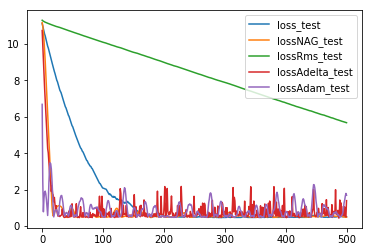

In [7]:
#画图
plt.plot(loss_test, label="loss_test")
plt.plot(lossNAG_test, label="lossNAG_test")
plt.plot(lossRms_test, label="lossRms_test")
plt.plot(lossAdelta_test, label ="lossAdelta_test")
plt.plot(lossAdam_test, label="lossAdam_test")
plt.legend(loc="upper right")
plt.show()